In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Importing Mushroom dataset 
df = pd.read_csv('/Users/juhimishra/Downloads/dataset1-master/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## EDA

In [3]:
df.shape

(8124, 23)

Total no of rows are - 8124,and column are - 23

In [4]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Here all the data are in string form as we can see above that all are showing object 

In [5]:
# If any missing data are available
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

with the above isnull we can conclude that that there is no missing data

In [6]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Here our target column is class so checked the total no of e and p present in data. As per the above count data is not imbalanced data. Same thing shown with the help of graph below

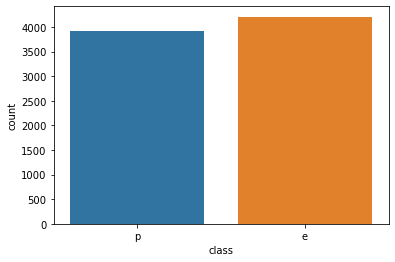

In [7]:
sns.countplot(df['class'])
plt.show()

In [8]:
# Converting all the string data using label encoder
le = LabelEncoder()

Encoding data with the help of Label encoder as our data is classification based data and are having categorical data so to convert all string to numeric label encoder done here.

In [9]:
# Using for loop to encode all features

for i in df:
    df1 = le.fit_transform(df[i])
    pd.Series(df1)
    df[i]=df1

In [10]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [12]:
x = df.drop(columns=['class'])
y = df['class']

In [13]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [14]:
x.shape

(8124, 22)

In [15]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [30]:
y.shape

(8124,)

Using standardscaler to scale all the feature data as scaling is not applicable on target column

In [16]:
# Instantiating Standard scaler
x_Scaler = StandardScaler()

In [17]:
scaler = x_Scaler.fit_transform(x)
scaler

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [18]:
# Instantiating all the models
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
svs = SVC()

In [22]:
# Training svc
svs.fit(x_train,y_train)

SVC()

In [21]:
x_train,x_test,y_train,y_test = train_test_split(scaler,y,test_size=0.30,random_state=46)

In [23]:
# Training DecisionTreeClassification
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
# Training RandomForestClassification
rf.fit(x_train,y_train)

RandomForestClassifier()

In [25]:
# Predicting x_test data using DecisionTreeClassifier
y_pred = dt.predict(x_test)

In [26]:
# Predicting x_test data using RandomForestClassifier
y_pred = rf.predict(x_test)

In [27]:
# Predicting x_test data using SVC
y_pred = svs.predict(x_test)

In [28]:
# Checking the accuracy score 
accuracy = accuracy_score(y_test,y_pred)
accuracy

1.0

accuracy score = 1

In [30]:
acc = classification_report(y_test,y_pred)
print (acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1242
           1       1.00      1.00      1.00      1196

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



With the help of classification report also we can see that our precision,recall,f1 score is 1

In [31]:
# Importing cross validation score
from sklearn.model_selection import cross_val_score

In [32]:
print(cross_val_score(dt,scaler,y,cv=5).mean())

0.9138079575596816


In [33]:
print(cross_val_score(rf,scaler,y,cv=5).mean())

0.8995267904509283


In [34]:
print (cross_val_score(svs,scaler,y,cv=5).mean())

0.8702213717317167


as per above report we got our best model that is DecisionTreeClassifier. Now will do the hyperparameter tuning using GridSearchcv.

In [46]:
# DecisionTreeClassifier
grid_param = {
    'criterion': ['gini','entropy'],
    'max_depth': range(3,12,2),
    'min_samples_leaf': range (3,10,2),
    'min_samples_split': range(4,10,2)
}

In [47]:
from sklearn.model_selection import GridSearchCV
grid_search =GridSearchCV(estimator = dt,
                         param_grid = grid_param,
                         cv=5,
                         n_jobs=-1)

In [48]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [50]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 4}

In [51]:
final_dt = DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_leaf=3,min_samples_split=4)
final_dt.fit(x_train,y_train)
pred = final_dt.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

100.0


So after doing hyperparameter tuning got 100% accuracy for DecisionTreeClassification Algorithm

## Saving the model

In [52]:
import joblib
joblib.dump(final_dt,'Finalmodel.pk1')

['Finalmodel.pk1']